In [2]:
#!pip install tensorflow keras split-folders opencv-python

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
import os
import random
import requests
from io import BytesIO
from PIL import Image
import warnings
warnings.filterwarnings("ignore")



In [4]:
input_folder = 'Agricultural-crops'
output_folder = 'ImageRecognition'

# split data into 3 part 
#80% - train 10% validation 10% - test
split_ratio = (0.8, 0.1, 0.1)

splitfolders.ratio(
    input_folder,
    output = output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix = None
)

Copying files: 829 files [00:01, 482.57 files/s]


In [5]:
# Define the parameters
img_size = (224,224)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [6]:
# Data Augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Data Augmentation for validation data (only rescaling)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
train_dir = os.path.join(output_folder,'train')
val_dir = os.path.join(output_folder,'val')
test_dir = os.path.join(output_folder,'test')

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)
valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


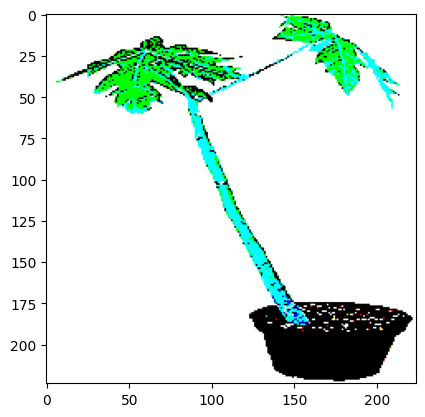

In [8]:
# Get a batch of images and labels
images, labels = next(valid_data)

#select a random image from the batch
idx = random.randint(0, images.shape[0] - 1)

#Display the image
plt.imshow(images[idx])
plt.show()

In [9]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet',include_top= False, input_shape= (img_size[0],img_size[1],3) )

base_model.trainable = False

In [10]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(30, activation = 'softmax')
])


In [11]:
train_data

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
model.fit(train_data, epochs=25, validation_data= valid_data)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.2938 - loss: 2.5559 - val_accuracy: 0.5139 - val_loss: 1.8828
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.3908 - loss: 2.2191 - val_accuracy: 0.6250 - val_loss: 1.5376
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.4435 - loss: 1.8876 - val_accuracy: 0.6111 - val_loss: 1.4007
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.5181 - loss: 1.6641 - val_accuracy: 0.6667 - val_loss: 1.2369
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.5819 - loss: 1.4478 - val_accuracy: 0.7778 - val_loss: 1.0356
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5678 - loss: 1.3870 - val_accuracy: 0.6944 - val_loss: 1.0377
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6235 - loss: 1.2589 - val_accuracy: 0.7500 - val_loss: 0.9438
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.6145 - loss: 1.2732 - val_accuracy: 0.7361 - val_loss:

In [14]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3368 - loss: 2.3506
Test Accuracy: 35.24%


In [15]:
dataset_dir = 'ImageRecognition/train'
class_names = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

print(class_names)

['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


In [38]:

def predict_img(image, model, class_names):
    # Check if the input is a URL or a local file
    if image.startswith('http://') or image.startswith('https://'):
        # Download the image from the URL
        response = requests.get(image)
        img = Image.open(BytesIO(response.content))
        print(img)
        img = np.array(img)
    elif os.path.exists(image):
        # Load the image from the local file system
        img = cv2.imread(image)
    else:
        print(f"Error: File {image} does not exist.")
        return
    
    # Preprocess the image
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict the class
    result = model.predict(img)
    predicted_class = np.argmax(result)
    
    # Print the result and the predicted class
    print("Prediction probabilities:", result)
    print("Predicted class index:", predicted_class)
    print("Predicted class name:", class_names[predicted_class])

img_url = 'https://blog.agribegri.com/public/blog_images/papaya-farming-guide-600x400.jpg'
predict_img(img_url, model, class_names)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x167E3A44530>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Prediction probabilities: [[9.5785126e-08 1.7129455e-08 4.0631960e-04 2.5999032e-07 1.7342121e-06
  5.8221254e-03 7.2442718e-10 3.9432507e-06 1.8365665e-04 1.4127804e-03
  9.0011723e-05 2.2942391e-08 8.7069587e-08 3.0479958e-05 4.7380759e-05
  1.9145271e-07 8.9303533e-08 1.0053634e-08 6.0498614e-06 2.6483591e-09
  9.9136961e-01 4.3270250e-09 3.4884937e-09 5.7289860e-04 5.6668494e-08
  3.6152219e-08 7.1452149e-08 2.8965431e-05 2.2942997e-05 2.6341237e-08]]
Predicted class index: 20
Predicted class name: papaya


In [17]:
model.save('image_model.keras')